# GameTheory 19b - Jeux Combinatoires (Python)

**Kernel** : Python 3

**Navigation** : [← GameTheory-19-Lean-CombinatorialGames](GameTheory-19-Lean-CombinatorialGames.ipynb) | [Index](GameTheory-1-Setup.ipynb) | [GameTheory-20-Lean-SocialChoice →](GameTheory-20-Lean-SocialChoice.ipynb)

---

## Introduction

Ce notebook compagnon du **notebook 19 (Lean)** fournit les **implementations Python** des algorithmes pour les jeux combinatoires :

- Calcul de la **valeur de Grundy** (mex)
- Simulation du jeu de **Nim**
- Theoreme de **Sprague-Grundy**
- Jeu de soustraction

Le notebook 19 Lean contient les **formalisations mathematiques**, celui-ci les **implementations pratiques**.

### Duree estimee : 30 minutes

In [1]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt

print("Notebook Python compagnon pour les jeux combinatoires")

Notebook Python compagnon pour les jeux combinatoires


---

## 1. Fonction Mex (Minimum Excludant)

Le **mex** (minimum excludant) d'un ensemble S est le plus petit entier non-negatif qui n'est pas dans S.

$$\text{mex}(S) = \min(\mathbb{N} \setminus S)$$

In [2]:
def mex(s: set) -> int:
    """Minimum excludant : plus petit entier >= 0 absent de s."""
    n = 0
    while n in s:
        n += 1
    return n

# Exemples
print("Exemples de mex:")
print(f"  mex({{0, 1, 2}}) = {mex({0, 1, 2})}")
print(f"  mex({{0, 2, 3}}) = {mex({0, 2, 3})}")
print(f"  mex({{1, 2, 3}}) = {mex({1, 2, 3})}")
print(f"  mex(set()) = {mex(set())}")

Exemples de mex:
  mex({0, 1, 2}) = 3
  mex({0, 2, 3}) = 1
  mex({1, 2, 3}) = 0
  mex(set()) = 0


---

## 2. Valeur de Grundy pour Nim

La **valeur de Grundy** d'un jeu est definie recursivement :

$$\text{grundy}(G) = \text{mex}\{\text{grundy}(G') : G' \text{ accessible depuis } G\}$$

In [3]:
def grundy_nim(n: int) -> int:
    """Valeur de Grundy de nim(n)."""
    # nim(n) peut aller vers nim(0), nim(1), ..., nim(n-1)
    # grundy(nim(k)) = k (par recurrence)
    return mex({grundy_nim(k) for k in range(n)})

# Verification
print("Valeurs de Grundy pour nim(n):")
for n in range(8):
    print(f"  grundy(nim({n})) = {grundy_nim(n)}")

print("\n=> grundy(nim(n)) = n (comme attendu)")

Valeurs de Grundy pour nim(n):
  grundy(nim(0)) = 0
  grundy(nim(1)) = 1
  grundy(nim(2)) = 2
  grundy(nim(3)) = 3
  grundy(nim(4)) = 4
  grundy(nim(5)) = 5
  grundy(nim(6)) = 6
  grundy(nim(7)) = 7

=> grundy(nim(n)) = n (comme attendu)


---

## 3. Theoreme de Sprague-Grundy

Pour une **somme de jeux impartiaux** :

$$\text{grundy}(G_1 + G_2 + ... + G_n) = \text{grundy}(G_1) \oplus \text{grundy}(G_2) \oplus ... \oplus \text{grundy}(G_n)$$

ou $\oplus$ est le **XOR binaire**.

In [4]:
def nim_sum(*heaps):
    """Valeur de Grundy d'un jeu de Nim a plusieurs tas."""
    result = 0
    for h in heaps:
        result ^= h  # XOR
    return result

def nim_winner(*heaps):
    """Determine qui gagne au Nim avec les tas donnes."""
    g = nim_sum(*heaps)
    if g == 0:
        return "Second joueur (P-position)"
    else:
        return f"Premier joueur (N-position, Grundy = {g})"

# Exemples
print("Nim avec tas [3, 5, 7]:")
print(f"  Grundy = {nim_sum(3, 5, 7)} = {bin(3)} XOR {bin(5)} XOR {bin(7)}")
print(f"  Gagnant: {nim_winner(3, 5, 7)}")

print("\nNim avec tas [1, 2, 3]:")
print(f"  Grundy = {nim_sum(1, 2, 3)} = 1 XOR 2 XOR 3")
print(f"  Gagnant: {nim_winner(1, 2, 3)}")

Nim avec tas [3, 5, 7]:
  Grundy = 1 = 0b11 XOR 0b101 XOR 0b111
  Gagnant: Premier joueur (N-position, Grundy = 1)

Nim avec tas [1, 2, 3]:
  Grundy = 0 = 1 XOR 2 XOR 3
  Gagnant: Second joueur (P-position)


---

## 4. Strategie Optimale au Nim

Pour trouver un **coup gagnant** quand Grundy != 0 :
1. Calculer Grundy de la position
2. Chercher un tas qu'on peut reduire pour rendre Grundy = 0

In [5]:
def find_winning_move(heaps):
    """Trouve un coup gagnant au Nim (si possible)."""
    g = nim_sum(*heaps)
    if g == 0:
        return None, "Position perdante (P-position)"
    
    for i, h in enumerate(heaps):
        # Si on enleve du tas i, le nouveau Grundy doit etre 0
        # target = XOR de tous les autres tas
        others = nim_sum(*[heaps[j] for j in range(len(heaps)) if j != i])
        target = others  # h' tel que h' XOR others = 0
        if target < h:  # On peut seulement reduire
            new_heaps = heaps.copy()
            new_heaps[i] = target
            return (i, target), f"Reduire tas {i} de {h} a {target} -> {new_heaps}"
    
    return None, "Erreur: pas de coup trouve"

# Exemple
heaps = [5, 7, 11]
print(f"Nim avec tas {heaps}:")
print(f"  Grundy = {nim_sum(*heaps)}")

move, description = find_winning_move(heaps)
print(f"  Coup gagnant: {description}")
if move:
    new_heaps = heaps.copy()
    new_heaps[move[0]] = move[1]
    print(f"  Verification: nouveau Grundy = {nim_sum(*new_heaps)}")

Nim avec tas [5, 7, 11]:
  Grundy = 9
  Coup gagnant: Reduire tas 2 de 11 a 2 -> [5, 7, 2]
  Verification: nouveau Grundy = 0


---

## 5. Jeu de Soustraction

Dans le **jeu de soustraction** $S(\{s_1, s_2, ...\})$ :
- Un tas de n objets
- A chaque tour, retirer exactement $s_i$ objets (pour un $s_i$ dans l'ensemble autorise)
- Le joueur qui ne peut plus jouer perd

In [6]:
def grundy_subtraction(n: int, moves: set, memo: dict = None) -> int:
    """Valeur de Grundy du jeu de soustraction."""
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n == 0:
        return 0
    
    reachable = set()
    for m in moves:
        if n - m >= 0:
            reachable.add(grundy_subtraction(n - m, moves, memo))
    
    result = mex(reachable)
    memo[n] = result
    return result

# Exemple : S({1, 3, 4})
moves = {1, 3, 4}
print(f"Jeu de soustraction S({moves})")
print("\nValeurs de Grundy:")

memo = {}
grundy_values = []
for n in range(20):
    g = grundy_subtraction(n, moves, memo)
    grundy_values.append(g)
    print(f"  G({n:2d}) = {g}")

print(f"\nSequence: {grundy_values}")

Jeu de soustraction S({1, 3, 4})

Valeurs de Grundy:
  G( 0) = 0
  G( 1) = 1
  G( 2) = 0
  G( 3) = 1
  G( 4) = 2
  G( 5) = 3
  G( 6) = 2
  G( 7) = 0
  G( 8) = 1
  G( 9) = 0
  G(10) = 1
  G(11) = 2
  G(12) = 3
  G(13) = 2
  G(14) = 0
  G(15) = 1
  G(16) = 0
  G(17) = 1
  G(18) = 2
  G(19) = 3

Sequence: [0, 1, 0, 1, 2, 3, 2, 0, 1, 0, 1, 2, 3, 2, 0, 1, 0, 1, 2, 3]


---

## 6. Visualisation des P-positions et N-positions

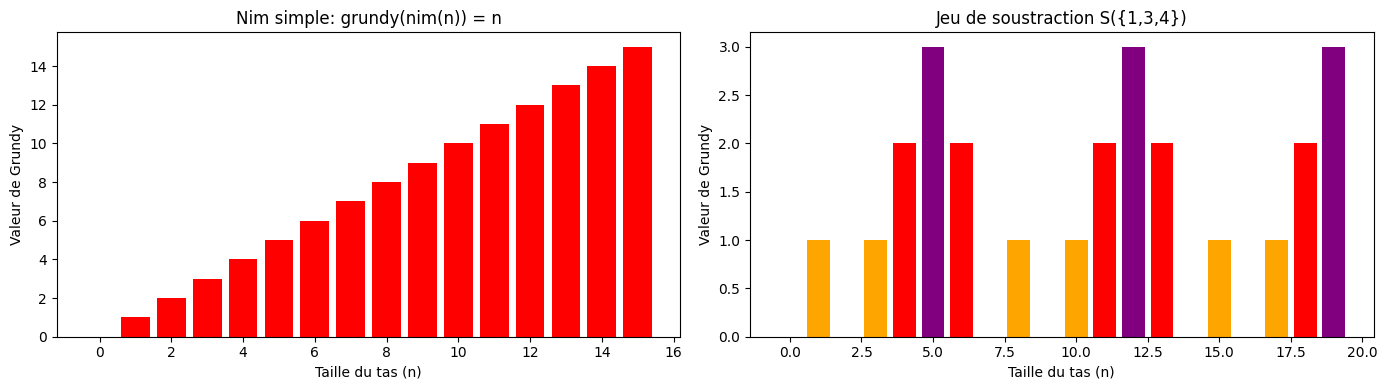

Vert = P-position (Grundy=0, second joueur gagne)
Autres couleurs = N-position (premier joueur gagne)


In [7]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Graphique 1 : Grundy pour Nim simple
n_values = list(range(16))
nim_grundy = [grundy_nim(n) for n in n_values]

ax1.bar(n_values, nim_grundy, color=['green' if g == 0 else 'red' for g in nim_grundy])
ax1.set_xlabel('Taille du tas (n)')
ax1.set_ylabel('Valeur de Grundy')
ax1.set_title('Nim simple: grundy(nim(n)) = n')

# Graphique 2 : Grundy pour jeu de soustraction
n_values2 = list(range(20))
sub_grundy = [grundy_subtraction(n, {1, 3, 4}) for n in n_values2]

colors = ['green' if g == 0 else 'orange' if g == 1 else 'red' if g == 2 else 'purple' for g in sub_grundy]
ax2.bar(n_values2, sub_grundy, color=colors)
ax2.set_xlabel('Taille du tas (n)')
ax2.set_ylabel('Valeur de Grundy')
ax2.set_title('Jeu de soustraction S({1,3,4})')

plt.tight_layout()
plt.show()

print("Vert = P-position (Grundy=0, second joueur gagne)")
print("Autres couleurs = N-position (premier joueur gagne)")

---

## Resume

| Fonction | Description |
|----------|-------------|
| `mex(S)` | Plus petit entier non dans S |
| `grundy_nim(n)` | Grundy de nim(n) = n |
| `nim_sum(*heaps)` | XOR des tailles de tas |
| `find_winning_move(heaps)` | Coup optimal au Nim |
| `grundy_subtraction(n, moves)` | Grundy pour jeu de soustraction |

**Theoreme de Sprague-Grundy** : Tout jeu impartial est equivalent a nim(grundy(G)).

---

**Navigation** : [← GameTheory-19-Lean-CombinatorialGames](GameTheory-19-Lean-CombinatorialGames.ipynb) | [Index](GameTheory-1-Setup.ipynb) | [GameTheory-20-Lean-SocialChoice →](GameTheory-20-Lean-SocialChoice.ipynb)